## 0.1) imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from pathlib import Path
from colorama import Fore, Style
from dateutil.parser import parse
from typing import Dict, List, Tuple, Sequence
from datetime import datetime

from power.params import *
from power.ml_ops.data import *
from power.ml_ops.model import *
from power.ml_ops.registry import load_model, save_model, save_results
from power.ml_ops.cross_val import get_X_y_seq, get_X_y_seq_pv
from power.interface.main import train, evaluate, pred

from power.utils import plot_loss_mae

import requests

2024-11-19 12:38:23.767905: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-19 12:38:24.398504: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-19 12:38:24.402713: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-19 12:38:29.569215: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#### Load saved sequences
sequence_cache_path = Path(LOCAL_DATA_PATH).joinpath("sequences")
X = np.load(sequence_cache_path.joinpath('X_train.npy'))
y = np.load(sequence_cache_path.joinpath('y_train.npy'))

X_full = np.load(sequence_cache_path.joinpath('X_train_full.npy'))
y_full = np.load(sequence_cache_path.joinpath('y_train_full.npy'))

## Get all data
data_processed_pv_cache_path = Path(LOCAL_DATA_PATH).joinpath("processed", f"processed_pv.csv")
data_processed_pv = pd.read_csv(data_processed_pv_cache_path)

data_processed_forecast_cache_path = Path(LOCAL_DATA_PATH).joinpath("processed", f"processed_weather_forecast.csv")
data_processed_forecast = pd.read_csv(data_processed_forecast_cache_path)


data_processed_pv.utc_time = pd.to_datetime(data_processed_pv.utc_time,utc=True)

min_date_pv= '1980-01-01 00:00:00'
min_date_forecast = '2017-10-07 00:00:00'
max_date = '2019-12-31 23:00:00'
train_pv = data_processed_pv[(data_processed_pv['utc_time'] > min_date_forecast) \
                                 & (data_processed_pv['utc_time'] < max_date)]

train_forecast = data_processed_forecast

stats_df = get_stats_table(data_processed_pv, capacity=False)
# pred_df = pred(input_pred='2022-07-06 12:00:00', forecast_features= False)

/home/jerome-roeser/code/jerome-roeser/11-Personal-Projects/git_repos/advanced-power-forecast/power/ml_ops/data.py:272: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  years_df['hour_of_year'] = years_df.utc_time.\


In [8]:
y_pred_pv = pred(forecast_features= False)
y_pred_forecast = pred(forecast_features= True)


⭐️ Use case: predict

Load data from local CSV...
✅ Data loaded, with shape (376944, 6)

Load latest model from local registry...

Load latest model from disk...


2024-11-19 12:41:50.283584: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-19 12:41:50.295002: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-19 12:41:50.302816: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

✅ Model loaded from local disk

Predict with {'electricity': 0, 'day_sin': 1, 'day_cos': 2, 'year_sin': 3, 'year_cos': 4} X_pred tensors         
 -> forecast features: False


2024-11-19 12:41:51.705875: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-19 12:41:51.711589: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-19 12:41:51.716313: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 1s 1s/step

✅ prediction done:  [[ 0.02377994  0.02213272  0.01315432  0.02075549  0.05093827  0.12132791
   0.22772363  0.3520069   0.46313584  0.53938013  0.5721409   0.55516976
   0.5191826   0.45038006  0.35290584  0.2515172   0.15520376  0.07836078
   0.03493737  0.01556206  0.01204582  0.00296879 -0.00496154 -0.01527172]] (1, 24) 


⭐️ Use case: predict

Load data from local CSV...
✅ Data loaded, with shape (376944, 6)

Load data from local CSV...
✅ Data loaded, with shape (91704, 24)

Load latest model from local registry...

Load latest model from disk...


2024-11-19 12:41:55.770679: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-19 12:41:55.777720: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-19 12:41:55.781666: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

✅ Model loaded from local disk

Predict with {'electricity': 0, 'day_sin': 21, 'day_cos': 22, 'year_sin': 23, 'year_cos': 24, 'temperature': 5, 'dew_point': 6, 'pressure': 7, 'ground_pressure': 8, 'humidity': 9, 'clouds': 10, 'rain': 11, 'snow': 12, 'ice': 13, 'fr_rain': 14, 'convective': 15, 'snow_depth': 16, 'accumulated': 17, 'hours': 18, 'rate': 19, 'probability': 20, 'Wx': 25, 'Wy': 26} X_pred tensors         
 -> forecast features: True


2024-11-19 12:41:56.816411: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-19 12:41:56.822665: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-19 12:41:56.827245: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 1s 1s/step

✅ prediction done:  [[0.13695635 0.1312954  0.12576167 0.12601697 0.1138956  0.09971845
  0.10265615 0.10753613 0.11267563 0.11922325 0.11989239 0.11581486
  0.12090086 0.12884232 0.1338112  0.13500968 0.14266115 0.13608047
  0.13459432 0.12228379 0.13395695 0.13446927 0.14005269 0.15244603]] (1, 24) 



<Axes: >

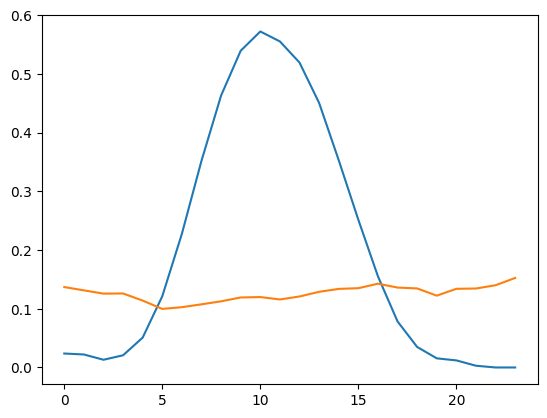

In [12]:
y_pred_pv.pred.plot()
y_pred_forecast.pred.plot()

In [13]:
evaluate(forecast_features= True)


⭐️ Use case: evaluate

Load data from local CSV...
✅ Data loaded, with shape (376944, 6)

Load data from local CSV...
✅ Data loaded, with shape (91704, 24)


100%|██████████| 1000/1000 [04:24<00:00,  3.78it/s]



Load latest model from local registry...

Load latest model from disk...


2024-11-19 12:50:50.647146: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-19 12:50:50.652979: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-19 12:50:50.657659: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

✅ Model loaded from local disk


2024-11-19 12:50:51.868603: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-19 12:50:51.875376: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-19 12:50:51.880354: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

✅ Model evaluated, MAE: 0.17
✅ Results saved locally
✅ evaluate() done 



(array([[[ 0.00000000e+00, -5.31579770e-13,  1.00000000e+00, ...,
          -8.92151243e-01, -2.58878231e+00, -7.12422657e+00],
         [ 0.00000000e+00,  2.58819045e-01,  9.65925826e-01, ...,
          -8.92151243e-01, -2.59324074e+00, -6.87732506e+00],
         [ 0.00000000e+00,  5.00000000e-01,  8.66025404e-01, ...,
          -8.92151243e-01, -3.02839613e+00, -6.06607103e+00],
         ...,
         [ 0.00000000e+00, -7.07106781e-01,  7.07106781e-01, ...,
          -8.99789981e-01, -3.13514328e+00, -7.77030945e-01],
         [ 0.00000000e+00, -5.00000000e-01,  8.66025404e-01, ...,
          -8.99789981e-01, -2.97412825e+00, -5.79190016e-01],
         [ 0.00000000e+00, -2.58819045e-01,  9.65925826e-01, ...,
          -8.99789981e-01, -2.87721753e+00, -4.98016804e-01]],
 
        [[ 0.00000000e+00, -5.00000000e-01,  8.66025404e-01, ...,
          -5.60073251e-01, -2.88558650e+00, -2.03329539e+00],
         [ 0.00000000e+00, -2.58819045e-01,  9.65925826e-01, ...,
          -5.60073251

In [14]:
evaluate(forecast_features= False)


⭐️ Use case: evaluate

Load data from local CSV...
✅ Data loaded, with shape (376944, 6)


100%|██████████| 1000/1000 [00:02<00:00, 356.70it/s]



Load latest model from local registry...

Load latest model from disk...


2024-11-19 12:51:00.448498: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-19 12:51:00.454746: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-19 12:51:00.458704: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

✅ Model loaded from local disk


2024-11-19 12:51:01.506804: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-19 12:51:01.510978: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-19 12:51:01.516390: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

✅ Model evaluated, MAE: 0.06
✅ Results saved locally
✅ evaluate() done 



(array([[[ 5.82000000e-01,  8.66025404e-01, -5.00000000e-01,
          -3.61537903e-02, -9.99346238e-01],
         [ 6.78000000e-01,  7.07106781e-01, -7.07106781e-01,
          -3.68700947e-02, -9.99320067e-01],
         [ 7.12000000e-01,  5.00000000e-01, -8.66025404e-01,
          -3.75863802e-02, -9.99293382e-01],
         ...,
         [ 1.17000000e-01,  9.65925826e-01,  2.58819045e-01,
          -6.83635154e-02, -9.97660478e-01],
         [ 2.83000000e-01,  1.00000000e+00,  1.20427970e-11,
          -6.90786032e-02, -9.97611220e-01],
         [ 4.49000000e-01,  9.65925826e-01, -2.58819045e-01,
          -6.97936556e-02, -9.97561450e-01]],
 
        [[ 0.00000000e+00, -5.00000000e-01,  8.66025404e-01,
          -8.46593561e-01, -5.32239930e-01],
         [ 0.00000000e+00, -2.58819045e-01,  9.65925826e-01,
          -8.46974844e-01, -5.31632970e-01],
         [ 0.00000000e+00, -5.89047225e-12,  1.00000000e+00,
          -8.47355691e-01, -5.31025736e-01],
         ...,
         [ 0.00

# 1) Train Function

In [ ]:
def train(
        min_date: str = '2017-10-07 00:00:00',
        max_date: str = '2019-12-31 23:00:00',
        split_ratio: float = 0.02, # 0.02 represents ~ 1 month of validation data on a 2009-2015 train set
        learning_rate: float =0.02,
        batch_size: int = 32,
        patience: int = 5,
        forecast_features: bool = False
    ) -> float:

    """
    - Download processed data from your BQ table (or from cache if it exists)
    - Train on the preprocessed dataset (which should be ordered by date)
    - Store training results and model weights

    Return val_mae as a float
    """

    print(Fore.MAGENTA + "\n⭐️ Use case: train" + Style.RESET_ALL)
    print(Fore.BLUE + "\nLoading preprocessed validation data..." + Style.RESET_ALL)


    # --First-- Load processed PV data using `get_data_with_cache` in chronological order
    query_pv = f"""
        SELECT *
        FROM {GCP_PROJECT}.{BQ_DATASET}.processed_pv
        ORDER BY utc_time
    """

    data_processed_pv_cache_path = Path(LOCAL_DATA_PATH).joinpath("processed", f"processed_pv.csv")
    data_processed_pv = get_data_with_cache(
        gcp_project=GCP_PROJECT,
        query=query_pv,
        cache_path=data_processed_pv_cache_path,
        data_has_header=True
    )
    # the processed PV data from bq needs to be converted to datetime object
    data_processed_pv.utc_time = pd.to_datetime(data_processed_pv.utc_time,utc=True)

    if data_processed_pv.shape[0] < 240:
        print("❌ Not enough processed data retrieved to train on")
        return None


    if forecast_features:
    # --Second-- Load processed Weather Forecast data in chronological order
        query_forecast = f"""
            SELECT *
            FROM {GCP_PROJECT}.{BQ_DATASET}.processed_weather_forecast
            ORDER BY forecast_dt_unixtime, slice_dt_unixtime
        """

        data_processed_forecast_cache_path = Path(LOCAL_DATA_PATH).joinpath("processed", f"processed_weather_forecast.csv")
        data_processed_forecast = get_data_with_cache(
            gcp_project=GCP_PROJECT,
            query=query_forecast,
            cache_path=data_processed_forecast_cache_path,
            data_has_header=True
        )



        if data_processed_forecast.shape[0] < 240:
            print("❌ Not enough processed data retrieved to train on")
            return None

        # Split the data into training and testing sets

        train_pv = data_processed_pv[(data_processed_pv['utc_time'] > min_date) \
                                 & (data_processed_pv['utc_time'] < max_date)]
        train_forecast = data_processed_forecast

        X_train, y_train = get_X_y_seq(train_pv,
                                    train_forecast,
                                    number_of_sequences=10_000,
                                    input_length=48,
                                    output_length=24,
                                    gap_hours=12)

        # Train model using `model.py`
        model = load_model(forecast_features=True)

        if model is None:
            model = initialize_model(X_train, y_train, n_unit=24)

        model = initialize_model(X_train, y_train, n_unit=24)

        model = compile_model(model, learning_rate=learning_rate)
        model, history = train_model(model,
                                    X_train,
                                    y_train,
                                    validation_split = 0.3,
                                    batch_size = 32,
                                    epochs = 50
                                    )
        val_mae = np.min(history.history['val_mae'])

        params = dict(
            context="train",
            training_set_size=f'Training data from {min_date} to {max_date}',
            row_count=len(X_train),
        )

        # Save results on the hard drive using taxifare.ml_logic.registry
        save_results(params=params, metrics=dict(mae=val_mae))

        # Save model weight on the hard drive (and optionally on GCS too!)
        save_model(model=model, forecast_features= True)

    else:

        # Split the data into training and testing sets
        train_pv = data_processed_pv[data_processed_pv['utc_time'] < max_date]

        X_train, y_train = get_X_y_seq_pv(train_pv,
                                    number_of_sequences=10_000,
                                    input_length=48,
                                    output_length=24,
                                    gap_hours=12)

        # Train model using `model.py`
        model = load_model()

        if model is None:
            model = initialize_model(X_train, y_train, n_unit=24)

        model = initialize_model(X_train, y_train, n_unit=24)

        model = compile_model(model, learning_rate=learning_rate)
        model, history = train_model(model,
                                    X_train,
                                    y_train,
                                    validation_split = 0.3,
                                    batch_size = 32,
                                    epochs = 50
                                    )

        val_mae = np.min(history.history['val_mae'])

        params = dict(
            context="train",
            training_set_size=f'Training data from {min_date} to {max_date}',
            row_count=len(X_train),
        )

        # Save results on the hard drive using power.ml_logic.registry
        save_results(params=params, metrics=dict(mae=val_mae), history=history)

        # Save model weight on the hard drive (and optionally on GCS too!)
        save_model(model=model)

    print("✅ train() done \n")

    return X_train, y_train, model, history

In [ ]:
X_train , y_train, model, history = train(forecast_features= False)
X_train.shape, y_train.shape

In [ ]:
# np.save(file= 'X_train', arr= X_train)
# np.save(file= 'y_train', arr= y_train)

X = np.load('X_train.npy')
y = np.load('y_train.npy')

In [ ]:
X.shape, y.shape

In [ ]:
X_train_full , y_train_full, model_full, history_full = train(forecast_features= True)
X_train_full.shape, y_train_full.shape

In [ ]:
# np.save(file= 'X_train_full', arr= X_train_full)
# np.save(file= 'y_train_full', arr= y_train_full)

X_full = np.load('X_train_full.npy')
y_full = np.load('y_train_full.npy')

In [ ]:
X_full.shape, y_full.shape

# 2) Model Evaluation 

## 2.1) historical PV production data training

In [ ]:
evaluate()


In [ ]:
plot_loss_mae(history), plot_loss_mae(history_full)

In [ ]:
model = initialize_model(X, y)
model = compile_model(model, learning_rate= 1e-3)
model, history = train_model(model, X, y)
plot_loss_mae(history)
model.summary()

## 2.2) historical PV production + historical weather-forecast data

In [ ]:
model = initialize_model(X_full, y_full)
model = compile_model(model, learning_rate=1e-3)
model, history = train_model(model, X_full, y_full)
plot_loss_mae(history)
model.summary()

In [ ]:
def get_baseline_data(input_date: str) -> np.array:
    """
    Return a numpy array for 3-days (before and ahead of sell date) statistics
    of PV power prodcution for a sell date.

    Input:
    the sell date: 'YYYY-MM-DD' e.g. '2022-07-06'

    Output:
    numpy array of shape (72,11) for 72 hours of data with 11 features
    Features:
        {0:'utc_time', 1:'local_time', 2:'electricity', 3:'hour_of_year',
        4:'mean', 5:'median', 6:'std', 7:'skew', 8'min', 9'max', 10:'count'}
    """
    # collect input for postprocess
    data_processed_pv_cache_path = Path(LOCAL_DATA_PATH).joinpath("processed", f"processed_pv.csv")
    data_processed_pv = pd.read_csv(data_processed_pv_cache_path)

    data_processed_pv.utc_time = pd.to_datetime(data_processed_pv.utc_time,utc=True)
    stats_df = get_stats_table(data_processed_pv, capacity=False)

    # get plot_df
    plot_df = postprocess(input_date, data_processed_pv, stats_df)

    # Send as dict from backend to frontend; NaNs have to be replaced
    plot_df = plot_df.fillna(0.0)
    # plot_dict = plot_df.to_dict()

    return plot_df

baseline_df = get_baseline_data(input_date= '2022-01-01')
baseline_array = baseline_df.to_numpy()
baseline_df

In [ ]:
baseline_array[-24:,4] # mean of day-ahead for keras lamdbda layer

In [ ]:
baseline_array[:24, 2] # day before sell for keras lambda layer

# 3) API Calls

In [ ]:
### API call ==================================================================
#base_url = "http://127.0.0.1:8000"
base_url = "https://power-v2-pdymu2v2na-ew.a.run.app"
#------------------------------------------------------------------------------

def call_visu(today_date):

    params_visu ={
        'input_date': today_date,   # '2000-05-15' (dt.date())
        'power_source': 'pv',
        'capacity': 'true'
        }

    endpoint_visu = "/visualisation"
    url_visu = f"{base_url}{endpoint_visu}"
    response_visu = requests.get(url_visu, params_visu).json()

    plot_df = pd.DataFrame.from_dict(response_visu)
    plot_df.utc_time = pd.to_datetime(plot_df.utc_time,utc=True)

    return plot_df

In [ ]:
import matplotlib.dates as dates


# used in the plots
today_date = '2022-07-10'
plot_df = call_visu(today_date)

#------------------------------------------------------------------------------


In [ ]:
show_true = 'No'

### capacity

# time variables
today_dt = pd.Timestamp(today_date, tz='UTC')
time = plot_df.utc_time.values

sep_future = today_dt + pd.Timedelta(days=1)
sep_past = today_dt
sep_order = today_dt + pd.Timedelta(hours=12)

# plot
fig, ax = plt.subplots(figsize=(15,5))

ax.axvline(sep_past, color='k', linewidth=0.7)
ax.axvline(sep_future, color='k', linewidth=0.7)
ax.vlines(sep_order, ymin=0, ymax=100, color='k', linewidth=0.7, linestyle='--')

# stats
# alpha_stats = 0.2
# ax.step(time, plot_df['min'].values, where='pre',
#         color='k', linestyle=':', alpha=alpha_stats, label='min')
# ax.step(time, plot_df['max'].values, where='pre',
#         color='k', linestyle=':', alpha=alpha_stats, label='max')
# ax.step(time, plot_df['mean'].values, where='pre',
#         color='k', linestyle='-', alpha=alpha_stats, label='mean')

# lower_bound = plot_df['mean'].values - 1 * plot_df['std'].values
# upper_bound = plot_df['mean'].values + 1 * plot_df['std'].values
# ax.fill_between(time, lower_bound, upper_bound, step='pre',
#                 color='gray',
#                 alpha=alpha_stats,
#                 label='std')

# true current production data
current = 37 # current production data
ax.step(time[:current], plot_df.cap_fac.values[:current], where='pre',
        color='orange', linewidth=4, label='true')

# prediction day ahead data
hori = -24
ax.step(time[hori:], plot_df.pred.values[hori:], where='pre',
        color='orange', linewidth=4, linestyle=':', label='pred')

###
if show_true == 'Yes':
    ax.step(time[-36:], plot_df.cap_fac.values[-36:], where='pre',
         color='orange', linewidth=4, linestyle='-', alpha=0.4)

# date ticks
ax.xaxis.set_major_locator(dates.HourLocator(byhour=range(24), interval=6, tz='UTC'))
# ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M %d/%m/%Y'))
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))

ax.set_xlim(today_dt - pd.Timedelta(days=1), today_dt + pd.Timedelta(days=2))
ax.set_ylim(0,120.0)
ax.set_xlabel('Time')
ax.set_ylabel('Capacity factor in %')

ax.annotate('Day-Ahead',(0.77,0.9), xycoords='subfigure fraction')
ax.annotate('Today',(0.48,0.9), xycoords='subfigure fraction')
ax.annotate('Day-Behind',(0.15,0.9), xycoords='subfigure fraction')
ax.annotate('Order book closed',(0.52,0.77), xycoords='subfigure fraction')
#ax.set_title(f"Day Ahead prediction for { sep_future.strftime('%d/%m/%Y') }")

# ax.legend();